# 4th Preiod - Convolutional Neural Networks

In [1]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from torch import tensor
import os 
import numpy as np 
import pandas as pd 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import precision_score, recall_score

## Load dataset

In [2]:
train_path = "dataset/clouds/clouds_train"
test_path = "dataset/clouds/clouds_test"

Formato original da imagem do DataLoader: torch.Size([1, 3, 128, 128])
Formato da imagem para plotagem: torch.Size([128, 128, 3])


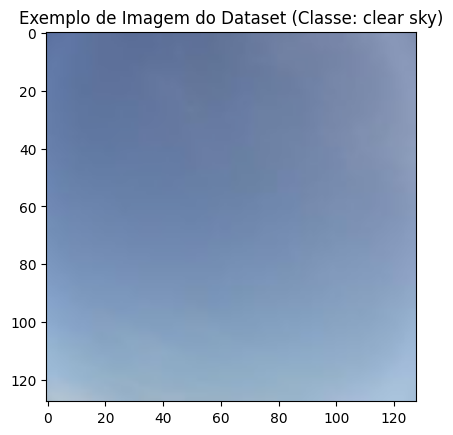

In [3]:
initial_train_transforms = transforms.Compose(
    [
        transforms.ToTensor(),         
        transforms.Resize((128, 128)),
    ]
)

dataset_train_initial = ImageFolder(
    train_path,
    transform=initial_train_transforms,
)

dataloader_train_initial = DataLoader(
    dataset_train_initial,
    shuffle=True, 
    batch_size=1,
)

image, label = next(iter(dataloader_train_initial))
print(f"Formato original da imagem do DataLoader: {image.shape}") 

image_for_plot = image.squeeze().permute(1, 2, 0)
print(f"Formato da imagem para plotagem: {image_for_plot.shape}") 

plt.imshow(image_for_plot)
plt.title(f"Exemplo de Imagem do Dataset (Classe: {dataset_train_initial.classes[label.item()]})")
plt.show()

In [4]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
])

dataset_train = ImageFolder(
  train_path, 
  transform=train_transforms,
)

dataloader_train = DataLoader(
  dataset_train,
  shuffle=True,
  batch_size=16
)

print(f"Classes encontradas: {dataset_train.classes}")
print(f"Mapeamento classe -> índice: {dataset_train.class_to_idx}")
num_classes = len(dataset_train.classes)
print(f"Número de classes: {num_classes}")

Classes encontradas: ['cirriform clouds', 'clear sky', 'cumulonimbus clouds', 'cumulus clouds', 'high cumuliform clouds', 'stratiform clouds', 'stratocumulus clouds']
Mapeamento classe -> índice: {'cirriform clouds': 0, 'clear sky': 1, 'cumulonimbus clouds': 2, 'cumulus clouds': 3, 'high cumuliform clouds': 4, 'stratiform clouds': 5, 'stratocumulus clouds': 6}
Número de classes: 7


In [5]:
import torch
def extract(dataloader):
    X_ = []
    Y_ = []

    for images, labels in dataloader:
        X_.append(images)
        Y_.append(labels)
        
        X = torch.cat(X_, dim=0)
        Y = torch.cat(Y_, dim=0)

        X = X.numpy()
        Y = Y.numpy()
    X = np.transpose(X, (0, 2, 3, 1))

    print('X shape:', X.shape)
    print('Y shape:', Y.shape)
    return X, Y

In [6]:
X_train, Y_train = extract(dataloader_train)

X shape: (474, 64, 64, 3)
Y shape: (474,)


In [7]:
model = Sequential([
    Conv2D(64, (3, 3), input_shape=(64, 64, 3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64),
    Activation("relu"),

    Dense(32),
    Activation("relu"),

    Dense(num_classes),
    Activation("softmax"),
])


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,479 (880.78 KB)

 Trainable params: 225,479 (880.78 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics = ["accuracy"],
    
)

In [10]:
model.fit(X_train, Y_train, epochs=20, validation_split=0.3)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.2034 - loss: 1.9434 - val_accuracy: 0.3357 - val_loss: 1.8525
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.2553 - loss: 1.9167 - val_accuracy: 0.3357 - val_loss: 1.8824
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.2545 - loss: 1.9067 - val_accuracy: 0.3357 - val_loss: 1.8359
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.2212 - loss: 1.9065 - val_accuracy: 0.3357 - val_loss: 1.8014
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.2429 - loss: 1.8854 - val_accuracy: 0.3357 - val_loss: 1.8392
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.2562 - loss: 1.8648 - val_accuracy: 0.3357 - val_loss: 1.7757
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.2431 - loss: 1.8413 - val_accuracy: 0.3357 - val_loss: 1.7622
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.2430 - loss: 1.8174 - val_accuracy: 0.3357 -

In [12]:

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)), 
    transforms.ToTensor(),       
])

dataset_test = ImageFolder(
    test_path,
    transform=test_transforms,
)

dataloader_test = DataLoader(
    dataset_test,
    shuffle=False, 
    batch_size=16  
)

print(f"Número de amostras no conjunto de teste: {len(dataset_test)}")
print(f"Classes no conjunto de teste: {dataset_test.classes}")

Número de amostras no conjunto de teste: 486
Classes no conjunto de teste: ['cirriform clouds', 'clear sky', 'cumulonimbus clouds', 'cumulus clouds', 'high cumuliform clouds', 'stratiform clouds', 'stratocumulus clouds']


In [13]:
X_test, Y_test = extract(dataloader_test)

X shape: (486, 64, 64, 3)
Y shape: (486,)


In [14]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f"Test Loss on {len(X_test)} test samples: {test_loss}")
print(f"Test Accuracy on {len(X_test)} test samples: {test_accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5198 - loss: 1.2461
Test Loss on 486 test samples: 1.2180083990097046
Test Accuracy on 486 test samples: 0.5329217910766602


In [23]:
predictions = np.argmax(model.predict(X_test), axis=1)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [24]:
predictions

array([4, 0, 0, 4, 4, 3, 0, 0, 0, 3, 4, 4, 4, 0, 0, 0, 3, 0, 4, 3, 4, 4,
       4, 0, 4, 4, 6, 0, 3, 4, 0, 4, 3, 0, 3, 0, 0, 3, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 4, 0, 0, 3, 1, 4, 0, 0, 0, 4, 3, 3, 0, 0, 0, 6, 0, 0,
       3, 0, 3, 4, 3, 0, 4, 4, 3, 3, 3, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 4,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3,
       2, 3, 3, 4, 3, 6, 3, 4, 3, 4, 3, 4, 3, 4, 0, 3, 3, 4, 3, 3, 3, 3,
       3, 6, 3, 3, 4, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 6, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 0, 4, 3, 3,
       4, 3, 6, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 0, 3, 6, 3, 4, 3, 3, 3, 0, 6, 6, 4, 4, 3, 4,
       3, 3, 4, 3, 2, 0, 3, 3, 6, 4, 4, 6, 4, 3, 3, 4, 6, 4, 6, 4, 4, 4,
       4, 4, 3, 4, 6, 3, 4, 0, 4, 4, 4, 4, 6, 0, 4,

In [25]:
predicted_labels = [dataset_train.classes[idx] for idx in predictions]